## Problem Set 3
By: Bethany Bailey

### 2.1

In [1]:
import numpy as np

In [2]:
def feasible(f_params, bvec_guess):
    nvec, A, alpha, delta = f_params
    b2, b3 = bvec_guess
    
    K = sum(bvec_guess)
    L = sum(nvec)
    r = alpha * A * ((L / K) ** (1 - alpha)) - delta
    w = (1 - alpha) * A * ((K / L) ** alpha)
    
    K_cnstr, c_cnstr, b_cnstr = np.full(1, False), np.full(3, False), np.full(2, False)
    
    c_cnstr[0] = nvec[0] * w - b2 < 0 
    c_cnstr[1] = nvec[1] * w + (1 + r) * b2 - b3 < 0
    c_cnstr[2] = nvec[2] * w + (1 + r) * b3 < 0
    
    K_cnstr[0] = sum(bvec_guess) < 0
    
    if c_cnstr[0] == True:
        b_cnstr[0] = True
    if c_cnstr[1] == True:
        b_cnstr[0], b_cnstr[1] = True, True
    if c_cnstr[2] == True:
        b_cnstr[1] = True
        
    return b_cnstr, c_cnstr, K_cnstr

In [3]:
# Set parameters
beta = .442
delta = .6415
sigma = 3.0
A = 1.0
alpha = .35

nvec = np.array([1.0, 1.0, .2])

In [4]:
# Make inputs:
f_params = (nvec, A, alpha, delta)

### (a)

In [5]:
bvec_guess1 = np.array([1.0, 1.2])
feasible(f_params, bvec_guess1)

(array([ True, False], dtype=bool),
 array([ True, False, False], dtype=bool),
 array([False], dtype=bool))

Nonegativity is violated (first period consumption is negative).

### (b)

In [6]:
bvec_guess2 = np.array([0.06, -0.001])
feasible(f_params, bvec_guess2)

(array([False, False], dtype=bool),
 array([False, False, False], dtype=bool),
 array([False], dtype=bool))

No constraints are violated.

### (c)

In [7]:
bvec_guess2 = np.array([0.1, 0.1])
feasible(f_params, bvec_guess2)

(array([False, False], dtype=bool),
 array([False, False, False], dtype=bool),
 array([False], dtype=bool))

No constraints are violated.

### 2.2

In [8]:
import time
import scipy.optimize as opt
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [9]:
def get_w(K, w_args):
    A, alpha, L = w_args
    
    w = (1 - alpha) * A * (((K) / (L)) ** alpha)
    
    return w

def get_r(K, r_args):
    A, alpha, delta, L = r_args
    
    r = alpha * A * ((L / (K)) ** (1 - alpha)) - delta
    
    return r

In [10]:
def get_SS(params, bvec_guess, SS_graphs):
    start_time = time.clock()
    
    beta, sigma, nvec, A, alpha, delta, SS_tol = params
    b2, b3 = bvec_guess
    
    L = sum(nvec)
    err_args = beta, sigma, A, alpha, delta, L
    w_args = A, alpha, L
    r_args = A, alpha, delta, L
    
    results_ss = opt.root(Eul_errs, bvec_guess, tol=SS_tol, args=(err_args))
    
    b_ss = results_ss.x
    w_ss = get_w(sum(b_ss), w_args)
    r_ss = get_r(sum(b_ss), r_args)
    c_ss = np.array([w_ss - b_ss[0], 
                     w_ss + (1 + r_ss)*b_ss[0] - b_ss[1],
                     (1 + r_ss)*b_ss[1] + .2 * w_ss])
    K_ss = np.sum(b_ss)
    Y_ss = A * (K_ss ** alpha) * (L ** (1 - alpha))
    C_ss = Y_ss - K_ss + (1 - delta) * K_ss
    
    EulErr_ss = np.array([beta * (1 + r_ss) * (c_ss[1] ** -sigma) - (c_ss[0] ** -sigma),
                          beta * (1 + r_ss) * (c_ss[2] ** -sigma) - (c_ss[1] ** -sigma)])
    RCerr_ss = Y_ss - C_ss - delta * K_ss
    
    ss_time = time.clock()
    
    # Create dictionary
    ss_output = {
        'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss, 
        'K_ss': K_ss, 'Y_ss': Y_ss, 'C_ss': C_ss, 
        'EulErr_ss': EulErr_ss, 'RCerr_ss': RCerr_ss, 
        'ss_time': ss_time}
     
    # Graph 
    if SS_graphs == True:
        s = np.array([1,2,3])
        plt.plot(s, ss_output['c_ss'])
        plt.xlabel('Age')
        plt.ylabel('Consumption')
        plt.title('Steady State Consumption')
        plt.show()

        plt.plot(s[1:], ss_output['b_ss'])
        plt.xlabel('Age')
        plt.ylabel('Saving')
        plt.title('Steady State Saving')
        plt.show()
        
    return ss_output

In [11]:
def Eul_errs(bvec, *err_args):

    beta, sigma, A, alpha, delta, L = err_args
    b2, b3 = bvec
    
    w_args = A, alpha, L
    r_args = A, alpha, delta, L
    w = get_w(b2 + b3, w_args) 
    r = get_r(b2 + b3, r_args) 
    
    # Consumption calculation
    c1 = w - b2
    c2 = w + (1 + r) * b2 - b3
    c3 = (1 + r) * b3 + 0.2 * w
    
    # Marginal utility calculation
    MU1 = c1 ** (-sigma)
    MU2 = c2 ** (-sigma)
    MU3 = c3 ** (-sigma)
    
    # Error calc
    err1 = MU1 - beta * (1 + r) * MU2
    err2 = MU2 - beta * (1 + r) * MU3
    
    return err1, err2

### (a) & (b)

In [12]:
SS_tol = 0.001
params = ((beta, sigma, nvec, A, alpha, delta, SS_tol))
bvec_guess = np.array([.1, .1])

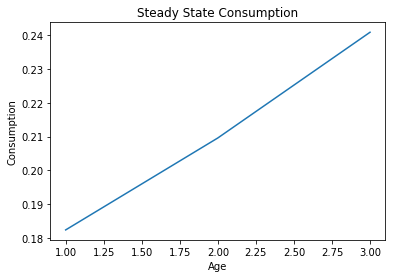

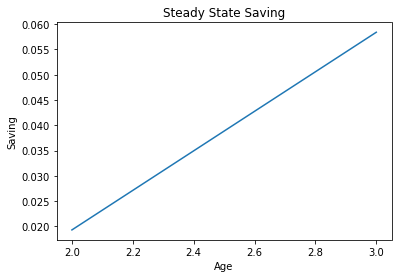

{'b_ss': array([ 0.01931262,  0.05841243]), 'c_ss': array([ 0.18241333,  0.20961424,  0.24087656]), 'w_ss': 0.20172594930955895, 'r_ss': 2.4330257711486469, 'K_ss': 0.077725047963728117, 'Y_ss': 0.68276475150927651, 'C_ss': 0.63290413324054495, 'EulErr_ss': array([ 0.00253831, -0.0054862 ]), 'RCerr_ss': -2.0816681711721685e-17, 'ss_time': 2.377096}


In [13]:
ss_output = get_SS(params, bvec_guess, SS_graphs=True)
print(ss_output)

It took 2.3ms to compute the steady state.

### (c)

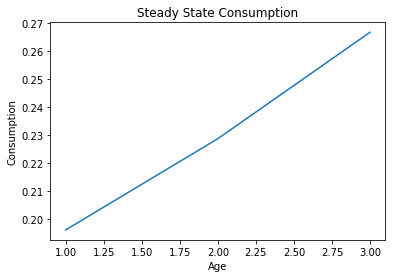

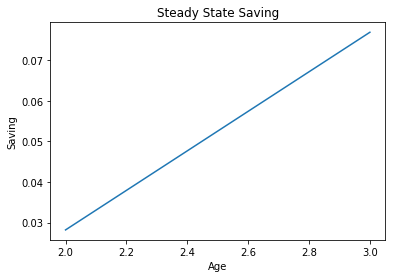

{'C_ss': 0.69128545415145637,
 'EulErr_ss': array([-0.00087544, -0.00013795]),
 'K_ss': 0.10504298717560716,
 'RCerr_ss': -5.5511151231257827e-17,
 'Y_ss': 0.7586705304246083,
 'b_ss': array([ 0.02817716,  0.07686583]),
 'c_ss': array([ 0.1959755 ,  0.22861645,  0.26669351]),
 'r_ss': 1.8863668551637944,
 'ss_time': 2.805062,
 'w_ss': 0.2241526567163615}

In [14]:
beta1 = .55
params1 = beta1, sigma, nvec, A, alpha, delta, SS_tol
results_ss = get_SS(params1, bvec_guess, SS_graphs=True)
results_ss

As households become more patient (e.g. beta = 0.55), what happens to each of these steady-state values? All the metrics (e.g. savings, consumption, and wage) increase other than the interest rate, which decreases.

The intuition behind this is that as beta increases and households become more patient, they discount the future less, and thus they save more. This increase in savings will lead to greater production, causing individuals to consume more and have higher wages. This will also cause a decrease in interest rate.

### 2.3

In [15]:
import scipy.linalg as la

In [16]:
# Set parameters
beta_annual = 0.96
beta = beta_annual ** 20 # economic lifetime is 60 years, 3 periods
sigma = 2.2
n_vec = np.array([1.0, 1.0, 0.2])
L = sum(n_vec)
alpha = 0.35
A = 1.0
delta_annual = 0.05
delta = 1 - (1 - delta_annual) ** 20

T = 50
path_toler = 1e-9
xi = 0.2
maxIter = 1000

params = beta, sigma, nvec, A, alpha, delta, path_toler

In [17]:
# Solve for the steady-state
results_ss = get_SS(params, bvec_guess, False)
b2bar, b3bar = results_ss['b_ss']

# Set initial condition
b21 = 0.8 * b2bar
b31 = 1.1 * b3bar

# Initial guess for K
K1 = b21 + b31
Kbar = b2bar + b3bar
Kpath = np.linspace(K1, Kbar, T)
# Add to make the same size
Kpath = np.append(Kpath, Kbar)
w_args = A, alpha, L
r_args = A, alpha, delta, L
rpath = get_r(Kpath, r_args)
wpath = get_w(Kpath, w_args)

# Add to make the same size.
rbar = get_r(Kbar, r_args)
wbar = get_w(Kbar, w_args)
rpath = np.append(rpath, rbar)
wpath = np.append(wpath, wbar)

In [18]:
def get_b32(b32, *err_args):

    beta, sigma, rpath, wpath, nvec, b21 = err1_args
    
    # Calculate consumption
    c1 = wpath[0] * nvec[1] + (1 + rpath[0]) * b21 - b32
    c2 = (1 + rpath[1]) * b32 + nvec[2] * wpath[1]
    
    # Calculate marginal utility
    MU1 = c1 ** (-sigma)
    MU2 = c2 ** (-sigma)
    
    # Calculate error 
    err = MU1 - beta * (1 + rpath[1]) * MU2
    
    return err

def get_b2t_b3t1(bvec, *err2_args):
    
    beta, sigma, rpath, wpath, nvec = err2_args 
    
    # Calculate consumption 
    c1 = nvec[0] * wpath[0] - bvec[0]
    c2 = nvec[1] * wpath[1] + (1 + rpath[0]) * bvec[0] - bvec[1]
    c3 = (1 + rpath[1]) * bvec[1] + nvec[2] * wpath[2]
    
    # Calculate marginal utility
    MU1 = c1 ** (-sigma)
    MU2 = c2 ** (-sigma)
    MU3 = c3 ** (-sigma)
    
    # Calculate error
    err1 = MU1 - beta * (1 + rpath[0]) * MU2
    err2 = MU2 - beta * (1 + rpath[1]) * MU3
    
    return err1, err2

In [19]:
eps = path_toler + 1
iteration = 1
bvec_guess = np.array([.1, .1])

while (iteration < maxIter) and (eps > path_toler):
    bmat = np.zeros((T+1,2))
    bmat[0,0] = b21
    bmat[0,1] = b31
    
    err1_args = beta, sigma, rpath[:2], wpath[:2], nvec, b21
    result1 = opt.root(get_b32, bmat[0,1], args=(err1_args))
    bmat[1,1] = result1.x
    EulErrs = np.zeros((T+1, 2))
    EulErrs[1,1] = result1.fun
    
    for t in range(1,T):
        err2_args = beta, sigma, rpath[t:t+2], wpath[t-1:t+2], nvec
        result2 = opt.root(get_b2t_b3t1, bvec_guess, args=(err2_args))
        bmat[t,0] = result2.x[0]
        bmat[t+1,1] = result2.x[1]
        EulErrs[t,0] = result2.fun[0]
        EulErrs[t+1,1] = result2.fun[1]

    max_EulErrs = np.abs(EulErrs).max(axis = 0)
    
    Kpath_prime = bmat[:-1].sum(axis=1)
    Kpath_prime = np.append(Kpath_prime, Kbar)
    eps = la.norm(Kpath_prime - Kpath, 2)
    Kpath_new = xi * Kpath_prime + (1 - xi) * Kpath
    Kpath = np.copy(Kpath_new)
    
    rpath = get_r(Kpath, r_args)
    wpath = get_w(Kpath, w_args)
    
    iteration = iteration + 1

### (a)

In [20]:
print("Maximum of the absolute values of all the Euler errors across the entire time path: ", max_EulErrs)

Maximum of the absolute values of all the Euler errors across the entire time path:  [  1.63495883e-11   3.09750448e-10]


In [21]:
Y_t = A * (Kpath[:-1] ** alpha) * (2.2 **(1 - alpha))
C_t = 2.2 * wpath[:-1] + (1 + rpath[:-1]) * bmat[:-1,0] - bmat[1:,0] + (1 + rpath[:-1]) * bmat[:-1,1] - bmat[1:,1]
RC_Err = Y_t - C_t - Kpath[1:] + (1 - delta) * Kpath[:-1]
max_RC_Err = np.abs(RC_Err).max()
print("Maximum of the absolute value of all the aggregate resource \n\
    constraint errors Yt − Ct − Kt+1 + (1 − δ)Kt across the entire time path:", max_RC_Err)

Maximum of the absolute value of all the aggregate resource 
    constraint errors Yt − Ct − Kt+1 + (1 − δ)Kt across the entire time path: 0.0237198032205


### (b) Plot the equlibrium time paths

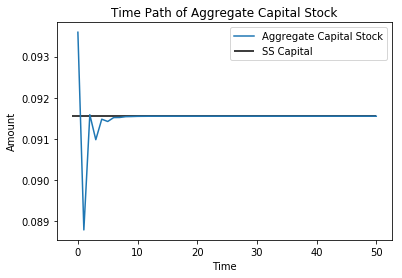

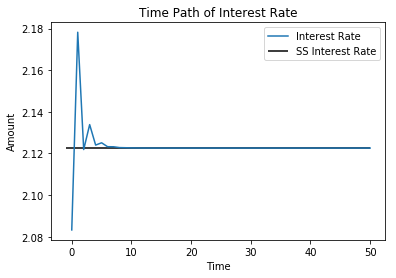

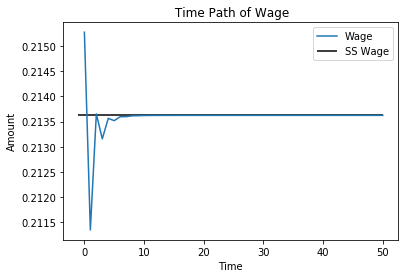

In [22]:
plt.plot(Kpath, label='Aggregate Capital Stock')
plt.hlines(Kbar, -1, T, label='SS Capital')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Time Path of Aggregate Capital Stock')
plt.legend()
plt.show()

plt.plot(rpath, label='Interest Rate')
plt.hlines(rbar, -1, T, label='SS Interest Rate')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Time Path of Interest Rate')
plt.legend()
plt.show()

plt.plot(wpath, label='Wage')
plt.hlines(wbar, -1, T, label='SS Wage')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title(' Time Path of Wage')
plt.legend()
plt.show()

In [24]:
Kpath_dist_ss = np.abs(Kpath - Kbar)
err =  .00001
first = np.where(Kpath_dist_ss < err)[0]
print("It took ", first[0], " periodsfor the economy to get within 0.00001 \n\
    of the steady-state aggregate capital stock.")
loc_cons = np.ediff1d(first) == 1
print("The period after which the aggregate capital stock never is again farther than \n\
    0.00001 away from the steady-state is", first[-len(loc_cons)])

It took  9  periodsfor the economy to get within 0.00001 
    of the steady-state aggregate capital stock.
The period after which the aggregate capital stock never is again farther than 
    0.00001 away from the steady-state is 10
